<br>

# <center> Count and Visualize Missing Data

<br>

---

<br>

# Can Delete this cell


In [11]:
#------------------------------------------------------------
# Mount Google Drive
#------------------------------------------------------------

'''
    This is required if the code runs in Google Colab.
    - this code will mount Google Drive for Colab.
    - the code needs to run only once.
'''

# # uncomment the below code, run and then comment again.
# from google.colab import drive
# drive.mount('/content/drive')

# this directory will be used as Root Directory to read/write any file
rootDir = '/content/drive/MyDrive/_ML/Machine Learning/_Lib/CodeBase/01. Supervised Learning/'


#------------------------------------------------------------
# Import Libraries
#------------------------------------------------------------

# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#------------------------------------------------------------
# importing local packages
#------------------------------------------------------------

# defining the path
packagePath = '/content/drive/MyDrive/_ML/Machine Learning/_Lib/_package'

# adding the path to sys
import sys
sys.path.append(packagePath)

# importing modules from MLtools_SH package
import MLtools_SH.missingValues as mv


#------------------------------------------------------------
# Import DataSet
#------------------------------------------------------------

# read dataset from a csv file
df = pd.read_csv('/content/drive/MyDrive/_ML/Machine Learning/_Lib/CodeBase/01. Supervised Learning/lending_club_loan_dataset.csv')


#------------------------------------------------------------
# User Defined Functions
#------------------------------------------------------------

# # all the user defined functions goes here

# from typing import Optional, Tuple

# def _checkCorrelation (
#     column_name: str, 
#     fig_size: Optional[tuple] = None
#   ):

#   '''
#     This function checks the correlation of the provided column with all the other numeric column.
#     Then draw a bar plot of the corellations.

#     Parameter
#     ---------
#     column_name
#       the name of the column
#     fig_size
#       the desired size of the figure. Default is None.

#     Return
#     ------
#     ret
#       No return

#   '''

#   # finding the correlation
#   correlation = df.corr()[column_name].drop(column_name)

#   # plotting the correlation
#   plt.figure(figsize=fig_size)
#   plt.ylabel('Correlation of revol_util')
#   correlation.sort_values().plot(kind='bar')

The visualization of missing data can be done in three different ways -

1.   Using Custom Package
2.   Using Python Library
3.   Using Seaborn 



<br>

## Dataset Overview

In [12]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

> comment: This dataset has 27 columns and some of the columns has missing values.

<br>

## 1. Using Custom Package

Documentation : [`Custom Package`](https://)

In [13]:
# Importing the custom package
import MLtools_SH.missingValues as mv


Total 6 column(s) has missing values.



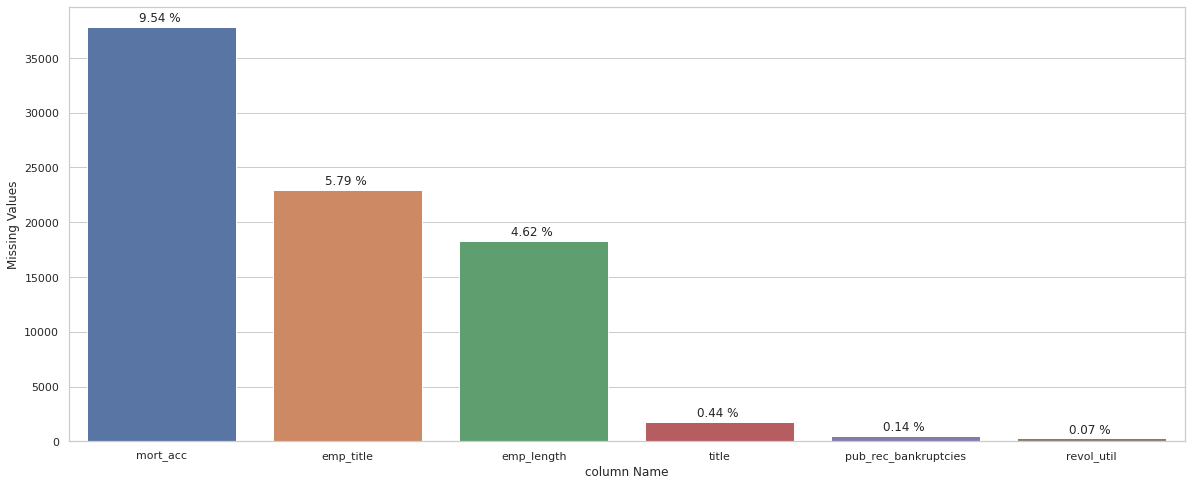

In [14]:
# counting and plotting the percentage of missing values
mv.countMissingValues(df, figsize=(20,8))

> comment: Six columns have missing values. Based on the values that are missing, the columns are arranged in descending order. 9.54% of the data in the first column are missing.

<br>

## 2. Using Python Library

Documentation : [`Missingno`](https://github.com/ResidentMario/missingno)

In [15]:
# # install missingno
# pip install missingno

In [16]:
# importing the missingno library
import missingno as msno

<br>

### BarPlot Visualization

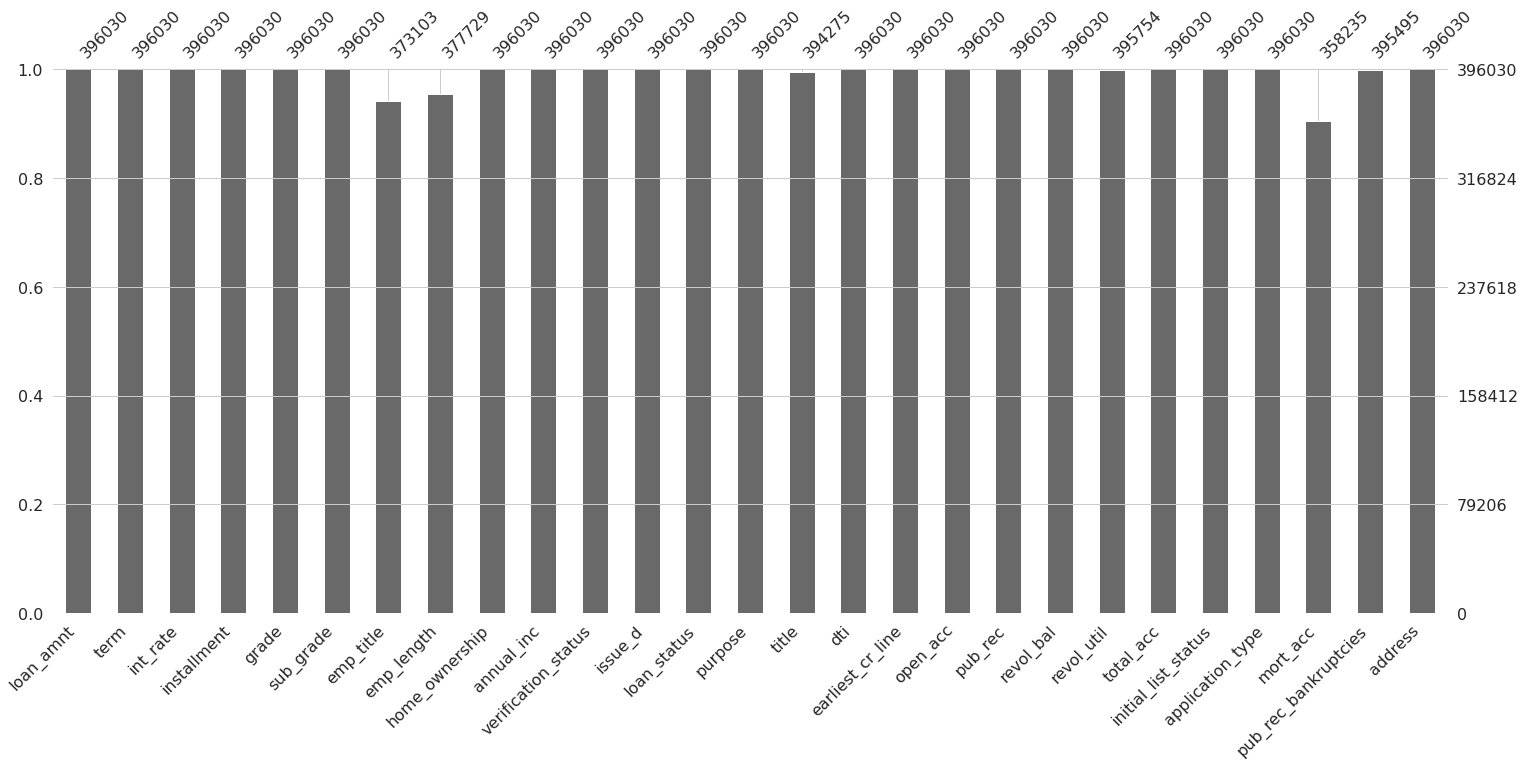

In [17]:
msno.bar(df)

> comment: Missing values may be seen in bars that are not aligned with the top line.

<br>

### Matrix Visualization

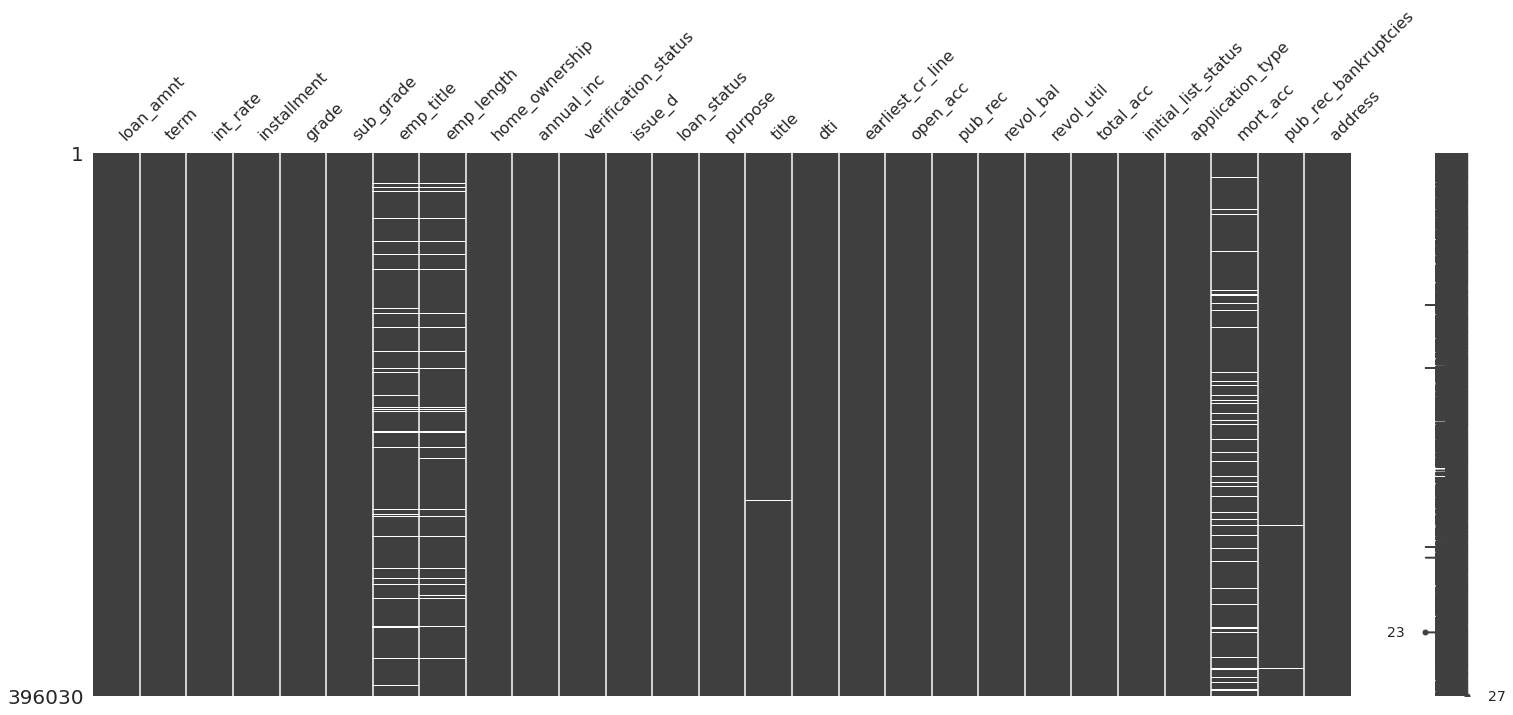

In [18]:
msno.matrix(df)

> comment: The number of lines indicates how many values are missing from that column.

<br>

## 3. Using Seaborn

Documentation : [`Seaborn`](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

### BarPlot Visualization

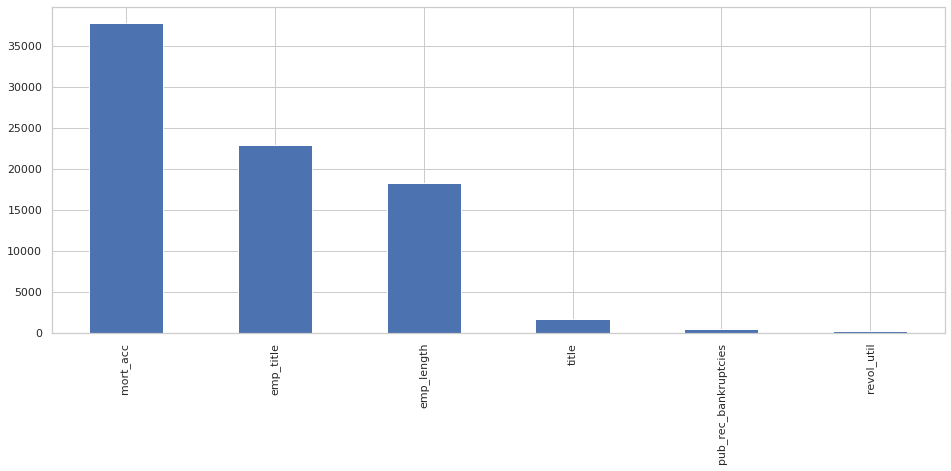

In [19]:
# defining desired figure size
plt.figure(figsize=(16,6))

# counting the missing values
missing = df.isna().sum().sort_values(ascending=False)

# droping the zero missing value count
missing = missing[ missing>0 ]

# plotting the count
missing.plot(kind='bar')

> comment: Six columns have missing values. Each bar's height represents the number of missing values for that particular column.

<br>

### Matrix Visualization

In [ ]:
# defining desired figure size
plt.figure(figsize=(16,8))

# plotting the matrix
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}
           )

> comment: The number of lines indicates how many values are missing from that column.